In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(dbplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# <span style="font-family:Papyrus; font-size:4em;">Tennis</span>

## Introduction  
1). background information  
2). the question we will ask (one and one only)  
3). identify and describe the **data set** we will use to answer the quetsion  

In [2]:
atp_data_frame <- read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")
head(atp_data_frame)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


Warning message:
“Removed 3 rows containing missing values (geom_point).”


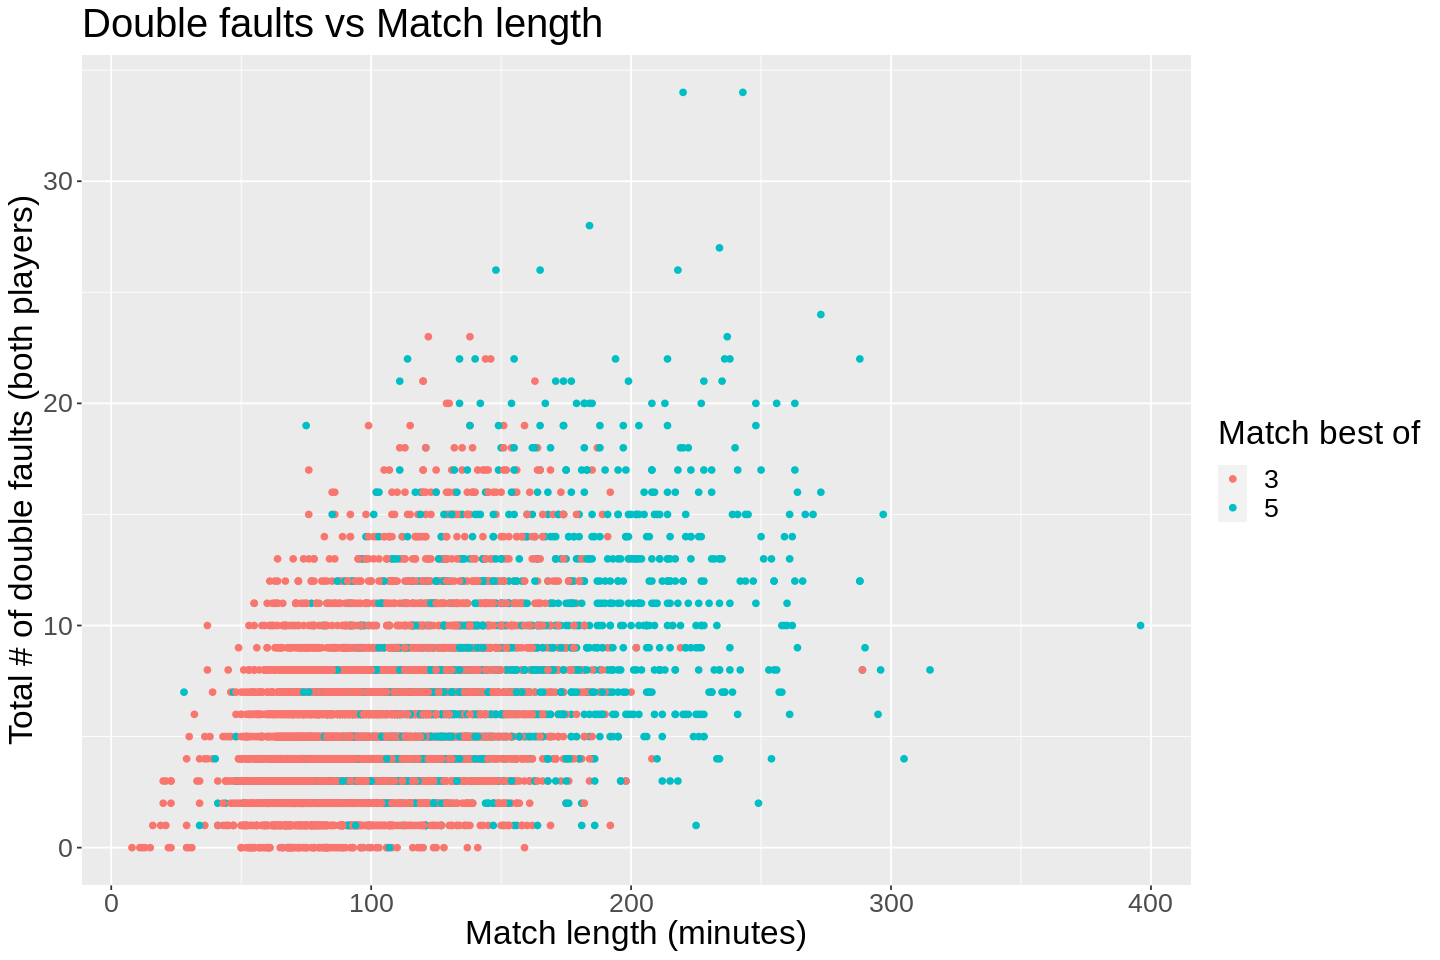

In [3]:
options(repr.plot.width = 12, repr.plot.height = 8) 

df_vs_time_plot <- atp_data_frame %>%
    filter(minutes < 500) %>%
    mutate(total_df = w_df + l_df) %>%
    mutate(best_of = as_factor(best_of)) %>%
    ggplot(aes(x=minutes,y=total_df)) +
        geom_point(aes(color = best_of)) +
        ggtitle("Double faults vs Match length") + 
        labs(x="Match length (minutes)",y="Total # of double faults (both players)", color="Match best of") + 
        theme(text = element_text(size = 20))

df_vs_time_plot

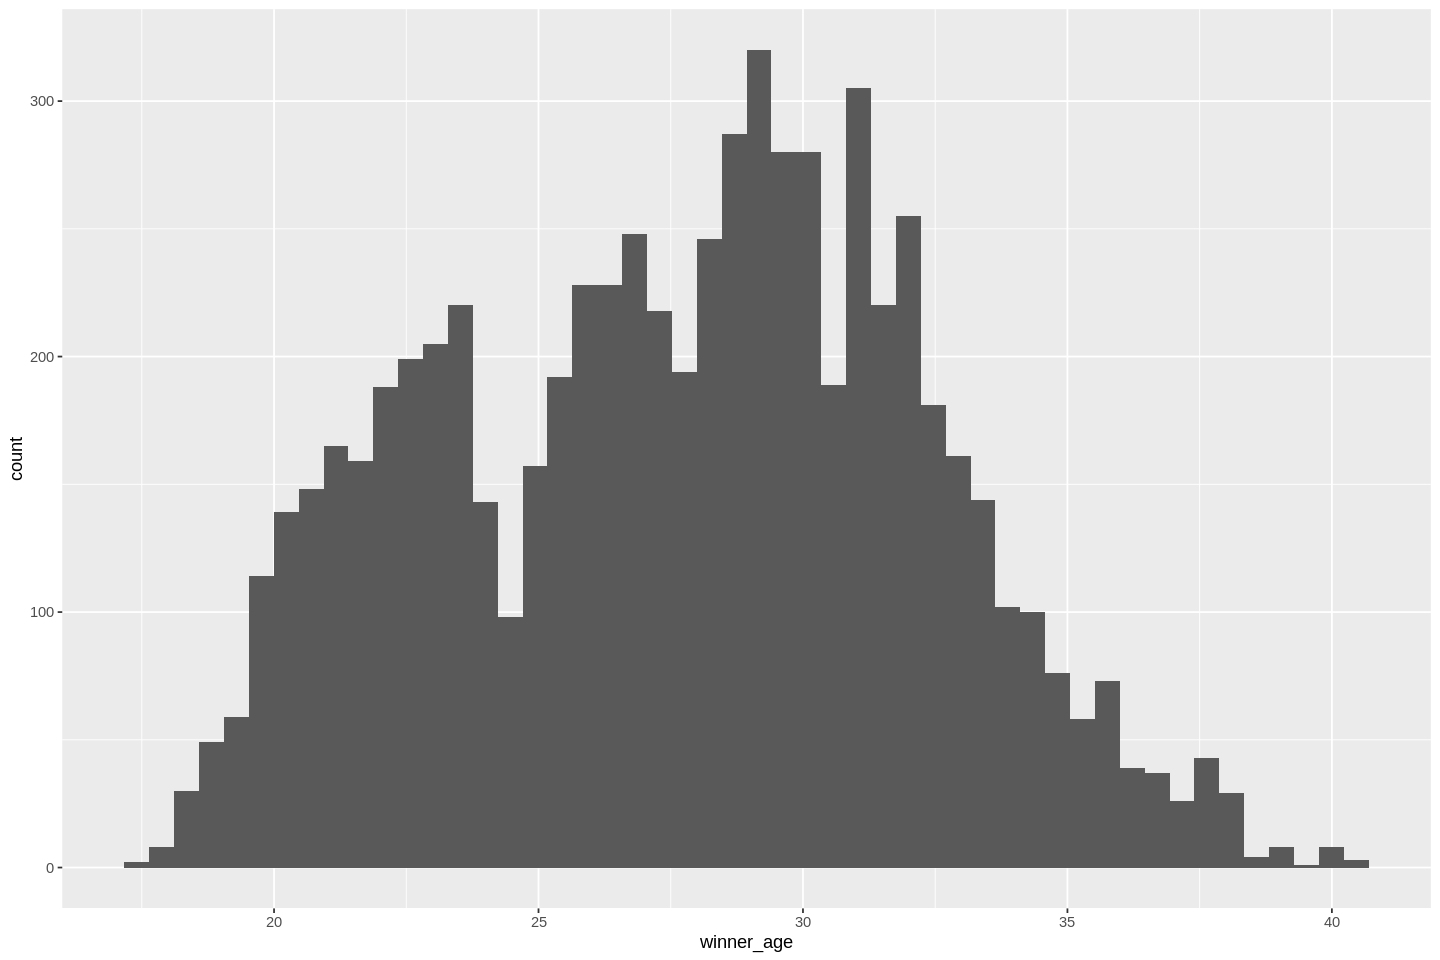

In [20]:
ggplot(atp_data_frame, aes(x=winner_age)) +
    geom_histogram(bins=50)

Warning message:
“Removed 3 rows containing missing values (geom_point).”


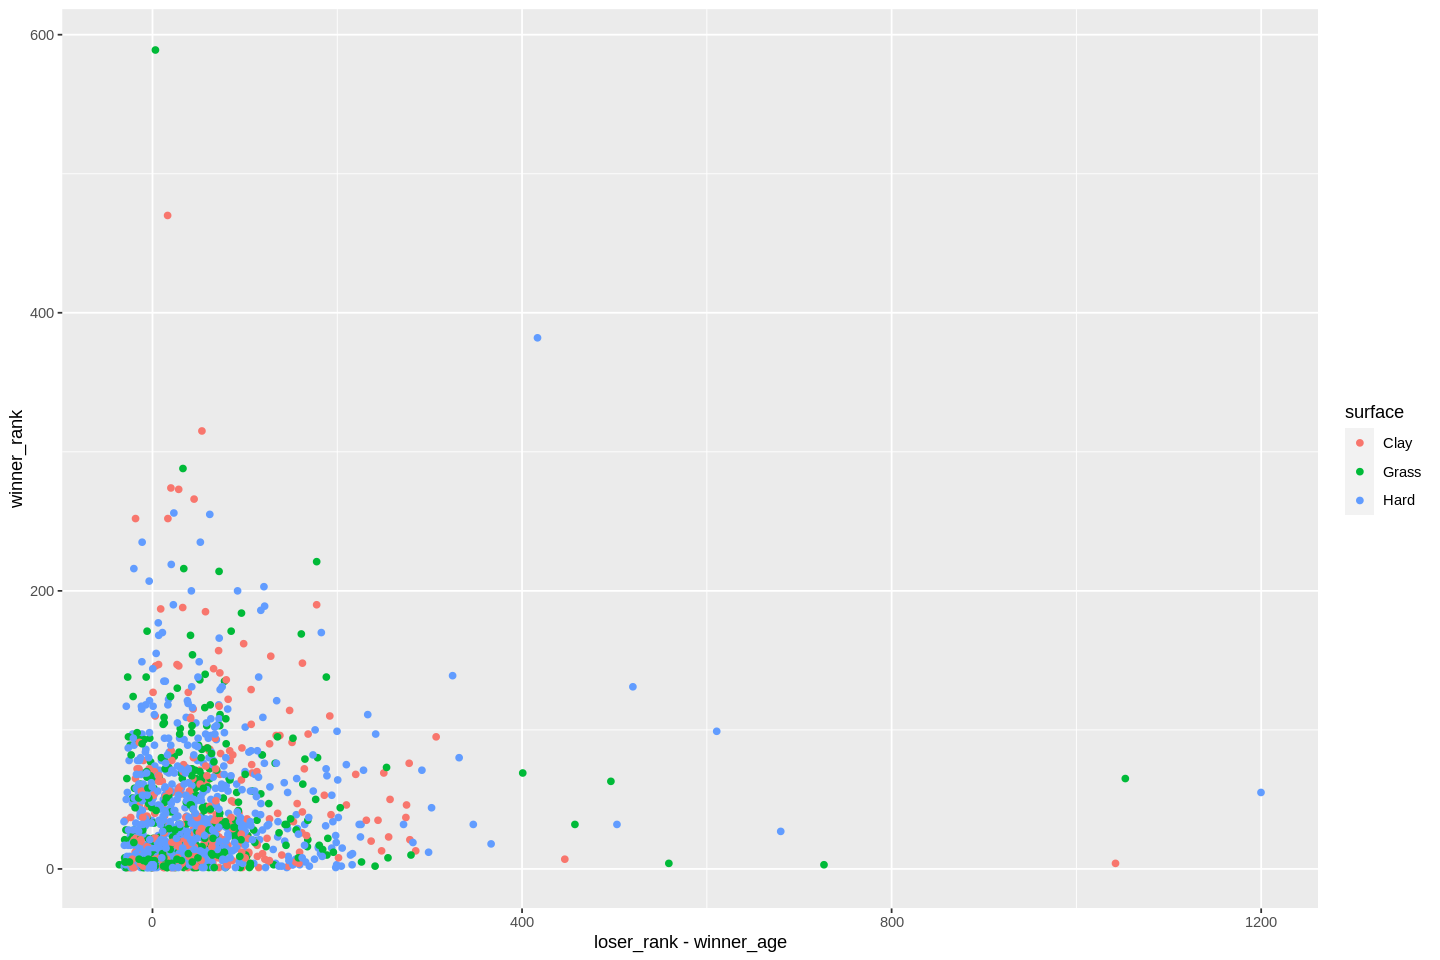

In [5]:
atp_data_frame %>%
filter(tourney_level == "G") %>%
ggplot(aes(x=loser_rank - winner_age, y = winner_rank)) +
    geom_point(aes(color=surface))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



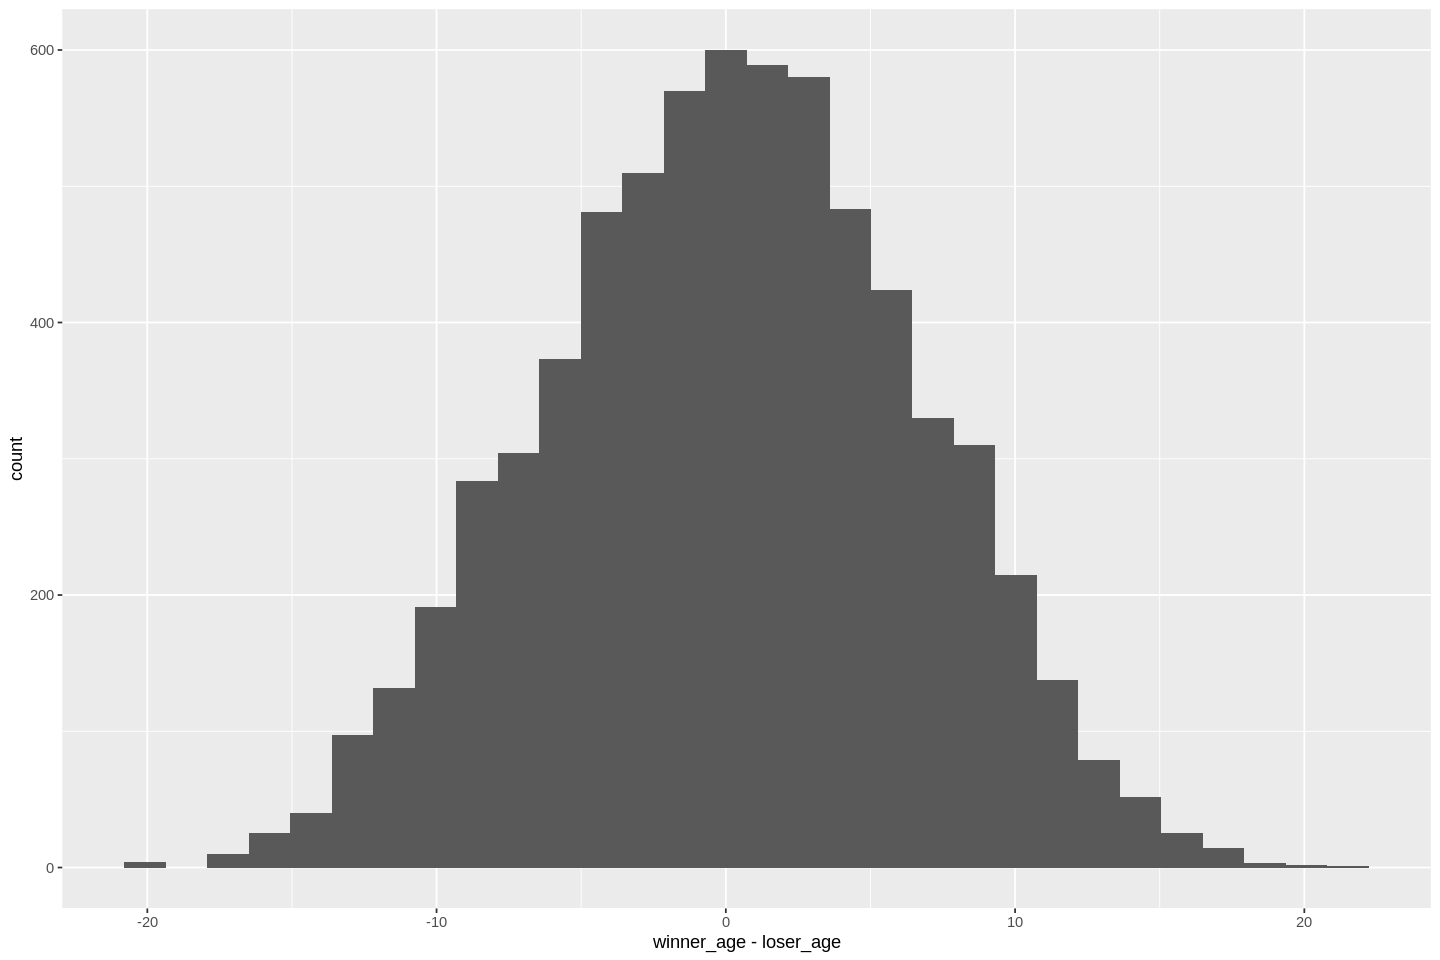

In [6]:
ggplot(atp_data_frame, aes(x=winner_age - loser_age)) +
    geom_histogram()

In [7]:
hi_rank_wins = nrow(filter(atp_data_frame, loser_rank_points < winner_rank_points))
lo_rank_wins = nrow(filter(atp_data_frame, loser_rank_points > winner_rank_points))
total_wins = hi_rank_wins + lo_rank_wins
hi_rank_pct = hi_rank_wins/total_wins

hi_rank_pct

[1] 0.6364964

In [9]:
colnames(atp_data_frame)

[1] "X1"                 "tourney_id"         "tourney_name"      
 [4] "surface"            "draw_size"          "tourney_level"     
 [7] "tourney_date"       "match_num"          "winner_id"         
[10] "winner_seed"        "winner_entry"       "winner_name"       
[13] "winner_hand"        "winner_ht"          "winner_ioc"        
[16] "winner_age"         "loser_id"           "loser_seed"        
[19] "loser_entry"        "loser_name"         "loser_hand"        
[22] "loser_ht"           "loser_ioc"          "loser_age"         
[25] "score"              "best_of"            "round"             
[28] "minutes"            "w_ace"              "w_df"              
[31] "w_svpt"             "w_1stIn"            "w_1stWon"          
[34] "w_2ndWon"           "w_SvGms"            "w_bpSaved"         
[37] "w_bpFaced"          "l_ace"              "l_df"              
[40] "l_svpt"             "l_1stIn"            "l_1stWon"          
[43] "l_2ndWon"           "l_SvGms"            "l_bpSaved"         
[46] "l_bpFaced"          "winner_rank"        "winner_rank_points"
[49] "loser_rank"         "loser_rank_points"

In [41]:
gs_winners <- atp_data_frame %>%
    filter(tourney_level == "G") %>%
    select(surface,
           plr_hand = winner_hand, plr_ht = winner_ht, plr_age = winner_age, plr_rank = winner_rank, plr_rank_points = winner_rank_points,
           opt_hand = loser_hand,  opt_ht = loser_ht,  opt_age = loser_age,  opt_rank =  loser_rank, opt_rank_points = loser_rank_points) %>%
    mutate(win = 1)

gs_losers <- atp_data_frame %>%
    filter(tourney_level == "G") %>%
    select(surface,
           plr_hand =  loser_hand, plr_ht =  loser_ht, plr_age =  loser_age, plr_rank =  loser_rank, plr_rank_points =  loser_rank_points,
           opt_hand = winner_hand, opt_ht = winner_ht, opt_age = winner_age, opt_rank = winner_rank, opt_rank_points = winner_rank_points) %>%
    mutate(win = 0)

gs_combined <- rbind(gs_winners,gs_losers) %>%
    arrange(desc())

surface,plr_hand,plr_ht,plr_age,plr_rank,plr_rank_points,opt_hand,opt_ht,opt_age,opt_rank,opt_rank_points,win
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hard,R,188,31.64956,1,9135,R,NA,25.00479,230,216,1
Hard,R,188,33.74401,177,290,L,190,29.51129,40,1063,1
Hard,R,NA,25.96304,82,691,R,NA,22.76249,144,379,1
Hard,L,NA,19.75086,27,1440,R,180,32.97467,85,658,1
Hard,R,163,28.10404,22,1785,R,NA,22.62560,89,650,1
Hard,R,193,28.24367,60,823,R,190,32.75838,108,525,1
Hard,R,183,26.68857,83,660,L,NA,25.51403,90,633,1
Hard,R,NA,22.92402,19,1865,R,NA,21.88638,119,472,1
Hard,R,178,31.64408,13,2315,R,NA,21.69473,79,702,1


## Preliminary exploratory data analysis  
read  
wrangle  
summarize(into at least one table)   
visualize (at least one plot)  

In [33]:
player_wins <- atp_data_frame %>%
    group_by(player_id = winner_id, surface) %>%
    summarize(height = mean(winner_ht, na.rm =TRUE),
              n_wins = n(),
              min_age_w  = min(winner_age),
              max_age_w  = max(winner_age),
              min_rank_points_w = min(winner_rank_points),
              max_rank_points_w = max(winner_rank_points),
              
             )

player_wins

`summarise()` regrouping output by 'player_id' (override with `.groups` argument)



player_id,surface,height,n_wins,min_age_w,max_age_w,min_rank_points_w,max_rank_points_w
<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
100644,Clay,198,48,19.99179,22.25325,2005,6040
100644,Grass,198,11,20.14511,22.15743,2860,5755
100644,Hard,198,79,19.74264,22.55989,1655,6595
103333,Clay,208,9,38.15195,40.24093,599,1830
103333,Grass,208,6,38.28611,40.33676,515,1730
103333,Hard,208,17,37.84531,40.62423,589,1795
103819,Clay,185,8,37.74127,37.79877,5590,5950
103819,Grass,185,32,35.86311,37.89459,4765,8920
103819,Hard,185,93,35.44148,38.25873,1980,10060


## Method  
1). explain how we will conduct data analysis  
2). describe how we will visualize result

## Expected outcomes and significance  